In [37]:
import autogen

# llm_config = {
#     "request_timeout": 600,
#     "seed": 44, # change the seed for different trials
#     "config_list": autogen.config_list_from_json(
#         "CONFIG_LIST.json",
#         filter_dict={"model": ["gpt-3.5-turbo-16k"]},
#     ),
#     "temperature": 0,
# }
    
    
config_list=[
    {
        "model": "TheBloke/Magicoder-S-DS-6.7B-GPTQ",
        "base_url": "https://arabia-sas-brooks-charts.trycloudflare.com/v1",
        'api_key': 'any string here is fine',
        # 'api_type': 'openai',
    }
]

llm_config={
    "config_list": config_list,
}

## Example Task: Literature Survey
We consider a scenario where one needs to find research papers of a certain topic, categorize the application domains, and plot a bar chart of the number of papers in each domain.

## Construct Agents
We create an assistant agent to solve tasks with coding and language skills. We create a user proxy agent to describe tasks and execute the code suggested by the assistant agent.

In [38]:
# create an AssistantAgent instance named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
)

# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
    max_consecutive_auto_reply=10,
    code_execution_config={
        "work_dir": "work_dir",
        "use_docker": False,
    },
)

## Step-by-step Requests

In [40]:
task1 = """
Temukan makalah arxiv yang menunjukkan bagaimana orang mempelajari fine-tuning large language model bahasa alami jangan simpan di xml file.
"""

user_proxy.initiate_chat(assistant, message=task1)

user_proxy (to assistant):


Temukan makalah arxiv yang menunjukkan bagaimana orang mempelajari fine-tuning large language model bahasa alami jangan simpan di xml file.


--------------------------------------------------------------------------------
assistant (to user_proxy):

Untuk mencari makalah di arXiv, kita dapat menggunakan API arXiv. Berikut adalah langkah-langkahnya:

1. Import library requests untuk mengirim permintaan HTTP ke API arXiv.
2. Buat fungsi untuk mengirim permintaan pencarian ke API arXiv dan mendapatkan hasilnya.
3. Panggil fungsi tersebut dengan parameter pencarian yang sesuai, seperti "fine-tuning large language model bahasa alami".
4. Parse hasil pencarian untuk mendapatkan judul, penulis, dan tautan ke makalah yang relevan.
5. Tampilkan hasil pencarian.

Berikut adalah contoh kode Python untuk mencari makalah di arXiv:

```python
import requests

def search_arxiv(query):
    url = 'http://export.arxiv.org/api/query'
    params = {
        'search_query': qu

user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
<?xml version="1.0" encoding="UTF-8"?>
<feed xmlns="http://www.w3.org/2005/Atom">
  <link href="http://arxiv.org/api/query?search_query%3Dfine-tuning%20large%20language%20model%20bahasa%20alami%26id_list%3D%26start%3D0%26max_results%3D5" rel="self" type="application/atom+xml"/>
  <title type="html">ArXiv Query: search_query=fine-tuning large language model bahasa alami&amp;id_list=&amp;start=0&amp;max_results=5</title>
  <id>http://arxiv.org/api/0pZU+284HktS15dtAT0DWWiDgs8</id>
  <updated>2023-11-01T00:00:00-04:00</updated>
  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">1045279</opensearch:totalResults>
  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>
  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">5</opensearch:itemsPerPage>
  <entry>
    <id>http://arxiv.org/abs/1706.07786v1</id>
  

In [41]:
task2 = "analisis hasil di atas untuk daftar domain aplikasi yang dipelajari oleh makalah-makalah ini"
user_proxy.initiate_chat(assistant, message=task2, clear_history=False)


user_proxy (to assistant):
analisis hasil di atas untuk daftar domain aplikasi yang dipelajari oleh makalah-makalah ini

--------------------------------------------------------------------------------
assistant (to user_proxy):

Berdasarkan hasil pencarian, berikut adalah daftar domain aplikasi yang dipelajari oleh makalah-makalah yang ditemukan:

1. Makalah pertama berjudul "Comparison of Modified Kneser-Ney and Witten-Bell Smoothing Techniques in Statistical Language Model of Bahasa Indonesia" membahas tentang teknik smoothing dalam model bahasa statistik untuk Bahasa Indonesia.

2. Makalah kedua berjudul "Parallelization of Maximum Entropy POS Tagging for Bahasa Indonesia with MapReduce" membahas tentang paralelisasi proses pelabelan pos tag menggunakan metode Maximum Entropy untuk Bahasa Indonesia dengan menggunakan model pemrograman MapReduce.

3. Makalah ketiga berjudul "Cold-Start Data Selection for Few-shot Language Model Fine-tuning: A Prompt-Based Uncertainty Propagation App

In [42]:
task3 = """gunakan data ini untuk membuat grafik batang dari domain dan jumlah makalah di domain tersebut dan simpan ke file"""
user_proxy.initiate_chat(assistant, message=task3, clear_history=False)

user_proxy (to assistant):
gunakan data ini untuk membuat grafik batang dari domain dan jumlah makalah di domain tersebut dan simpan ke file

--------------------------------------------------------------------------------
assistant (to user_proxy):

# filename: create_bar_chart.py

import matplotlib.pyplot as plt

# Data domain dan jumlah makalah
data = {
    'Model Bahasa Statistik': 1,
    'Pemrosesan Bahasa Alami': 1,
    'Fine-tuning Model Bahasa': 2,
    'Sintesis Teks ke Gambar': 1
}

# Membuat grafik batang
plt.bar(data.keys(), data.values())

# Menambahkan label pada sumbu x dan y
plt.xlabel('Domain Aplikasi')
plt.ylabel('Jumlah Makalah')

# Menambahkan judul grafik
plt.title('Jumlah Makalah per Domain Aplikasi')

# Menyimpan grafik ke file
plt.savefig('bar_chart.png')

# Menampilkan grafik
plt.show()

--------------------------------------------------------------------------------
user_proxy (to assistant):



------------------------------------------------------------------

user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
Figure(640x480)


--------------------------------------------------------------------------------
assistant (to user_proxy):

Grafik batang telah berhasil dibuat dan disimpan dalam file "bar_chart.png". Anda dapat membuka file tersebut untuk melihat grafik batang yang menunjukkan jumlah makalah di setiap domain aplikasi.

Apakah ada yang lain yang bisa saya bantu?

--------------------------------------------------------------------------------
user_proxy (to assistant):



--------------------------------------------------------------------------------
assistant (to user_proxy):

Tidak ada yang lain yang bisa saya bantu. Jika Anda memiliki pertanyaan lain di masa depan, jangan ragu untuk bertanya. Sampai jumpa lagi!

--------------------------------------------------------------------------------
user_proxy (to assistant):



--------------------------------------------------------------------------------
ass

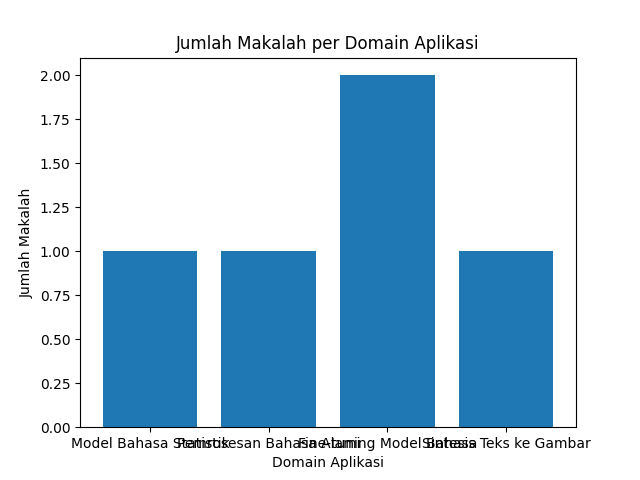

In [43]:
# from IPython.display import Image
# Image(filename="work_dir/bar_chart.png")

In [44]:
task4 = """
Renungkan urutan tersebut dan buat resep yang berisi semua langkah yang diperlukan dan beri nama untuknya. Sarankan fungsi python yang terdokumentasi dengan baik dan digeneralisasi untuk melakukan tugas-tugas pemrograman yang serupa di masa depan. Pastikan langkah-langkah pemrograman dan non-pemrograman tidak pernah dicampur dalam satu fungsi. Dalam docstr dari fungsi, jelaskan langkah-langkah non-pemrograman apa yang diperlukan untuk menggunakan keterampilan bahasa asisten.
"""

user_proxy.initiate_chat(assistant, message=task4, clear_history=False)

user_proxy (to assistant):


Renungkan urutan tersebut dan buat resep yang berisi semua langkah yang diperlukan dan beri nama untuknya. Sarankan fungsi python yang terdokumentasi dengan baik dan digeneralisasi untuk melakukan tugas-tugas pemrograman yang serupa di masa depan. Pastikan langkah-langkah pemrograman dan non-pemrograman tidak pernah dicampur dalam satu fungsi. Dalam docstr dari fungsi, jelaskan langkah-langkah non-pemrograman apa yang diperlukan untuk menggunakan keterampilan bahasa asisten.


--------------------------------------------------------------------------------
assistant (to user_proxy):

Untuk membuat resep yang berisi langkah-langkah yang diperlukan dan fungsi Python yang terdokumentasi dengan baik, berikut adalah resep yang dapat Anda ikuti:

1. Nama Resep: create_bar_chart

   Langkah-langkah:
   - Membaca data domain dan jumlah makalah.
   - Membuat grafik batang menggunakan library matplotlib.
   - Menambahkan label pada sumbu x dan y.
   - Menambahkan jud

## Reuse Recipes
The user can apply the same recipe to similar tasks in future.

## Example Application

In [ ]:
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
)

# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
    max_consecutive_auto_reply=10,
    code_execution_config={
        "work_dir": "work_dir",
        "use_docker": False,
    },
)

task1 = """
1. Nama Resep: create_bar_chart

   Langkah-langkah:
   - Membaca data domain dan jumlah makalah.
   - Membuat grafik batang menggunakan library matplotlib.
   - Menambahkan label pada sumbu x dan y.
   - Menambahkan judul grafik.
   - Menyimpan grafik ke file.
   - Menampilkan grafik.

   Fungsi Python:
   ```python
   import matplotlib.pyplot as plt

   def create_bar_chart(data, xlabel, ylabel, title, filename):

       # Membuat grafik batang dari data domain dan jumlah makalah.

       Args:
           data (dict): Data domain dan jumlah makalah.
           xlabel (str): Label sumbu x.
           ylabel (str): Label sumbu y.
           title (str): Judul grafik.
           filename (str): Nama file untuk menyimpan grafik.

       Returns:
           None
       plt.bar(data.keys(), data.values())
       plt.xlabel(xlabel)
       plt.ylabel(ylabel)
       plt.title(title)
       plt.savefig(filename)
       plt.show()
   ```

2. Nama Resep: search_arxiv_papers

   Langkah-langkah:
   - Mengirim permintaan pencarian ke API arXiv.
   - Mendapatkan hasil pencarian dalam format XML.
   - Parsing hasil pencarian untuk mendapatkan judul, penulis, dan tautan makalah yang relevan.

   Fungsi Python:
   ```python
   import requests
   from xml.etree import ElementTree as ET

   def search_arxiv_papers(query, max_results=5):
       # Mencari makalah di arXiv berdasarkan query.

       Args:
           query (str): Query pencarian.
           max_results (int): Jumlah maksimum hasil pencarian yang diinginkan.

       Returns:
           list: Daftar makalah yang relevan dengan query.
       
       url = 'http://export.arxiv.org/api/query'
       params = {
           'search_query': query,
           'max_results': max_results
       }
       response = requests.get(url, params=params)
       root = ET.fromstring(response.text)
       papers = []
       for entry in root.findall('{http://www.w3.org/2005/Atom}entry'):
           title = entry.find('{http://www.w3.org/2005/Atom}title').text
           authors = [author.find('{http://www.w3.org/2005/Atom}name').text for author in entry.findall('{http://www.w3.org/2005/Atom}author')]
           link = entry.find('{http://www.w3.org/2005/Atom}link[@title="pdf"]').attrib['href']
           papers.append({'title': title, 'authors': authors, 'link': link})
       return papers
   ```

Dalam docstring dari fungsi-fungsi tersebut, Anda dapat menjelaskan langkah-langkah non-pemrograman yang diperlukan untuk menggunakan keterampilan bahasa asisten, seperti menginstal library yang diperlukan atau mengakses API dengan kunci API yang valid.

Pastikan untuk mengganti `<filename>` dengan nama file yang sesuai saat menyimpan grafik batang.

Dengan menggunakan resep ini, Anda dapat dengan mudah membuat grafik batang dari data domain dan jumlah makalah, serta melakukan pencarian makalah di arXiv berdasarkan query.
"""

In [ ]:
user_proxy.initiate_chat(assistant, message=task1)